## 공공데이터를 이용한 카페 상권분석(2022 Ver.)


**들어가며**

- 공공데이터를 통해 대한민국을 이해해봅시다(?).
- 공공데이터포털(data.go.kr)에 다양한 데이터가 공개되어 있습니다.
- 그 중에 카페(라는 업종분류)들에 대해서 현황을 조사하려고 합니다.

**명세사항**
1. 전국 카페 데이터를 모두 수집해야합니다.
2. 지역별 or 브랜드별 점포 현황을 확인합니다.
3. 분석 결과를 시각화합니다. 

## 0. Data Description

- 소상공인 상권 데이터를 국내에 있는 모든 소상공인으로 등록된 점포들에 대한 정보를 제공합니다.

[데이터] https://www.data.go.kr/data/15083033/fileData.do

In [ ]:
# 라이브러리를 불러옵니다.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from glob import glob
import os

### 1. 데이터 불러오기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# 다운로드 받은 데이터중 일부를 열어봅니다.
seoul= pd.read_csv('/content/drive/MyDrive/소상공인시장진흥공단_상가(상권)정보_20211231/소상공인시장진흥공단_상가(상권)정보_서울_202112.csv')
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23324279,제중건강원,NaN,D,소매,D10,건강/미용식품,D10A07,건강원,G47216,...,1156010600100410002034626,NaN,서울특별시 영등포구 영중로14길 11-17,150035,7250.0,NaN,1,NaN,126.907168,37.520613
1,24525909,민속악기사,NaN,D,소매,D04,취미/오락관련소매,D04A09,악기판매,G47593,...,1120012200101420011000227,NaN,서울특별시 성동구 용답5길 2,133849,4803.0,NaN,NaN,NaN,127.049018,37.566857
2,24715368,태평양진주,NaN,D,소매,D26,시계/귀금속소매,D26A01,시계/귀금속,G47830,...,1111015200100440000000001,금사랑투빌딩,서울특별시 종로구 서순라길 17-10,110390,3138.0,NaN,NaN,NaN,126.993530,37.571848
3,15554136,김선희꼼꼼국어교습소,NaN,R,학문/교육,R01,학원-보습교습입시,R01A01,학원-입시,P85501,...,1171011100101970003017195,NaN,서울특별시 송파구 위례성대로12길 31,138834,5640.0,NaN,2,NaN,127.121520,37.510967
4,17174175,비지트,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,1165010100108540018009586,상랑의빌딩,서울특별시 서초구 동광로18길 82,137837,6572.0,NaN,1,NaN,126.991394,37.488375
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315289,17915026,사라헤어하우스,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1162010100108610014026971,NaN,서울특별시 관악구 관악로 185,151811,8758.0,NaN,3,NaN,126.952644,37.481784
315290,17917525,김현진153필라테스,NaN,N,관광/여가/오락,N05,요가/단전/마사지,N05A01,요가/단식,S96129,...,1174010900100510007009699,남해빌딩,서울특별시 강동구 양재대로 1517,134862,5316.0,NaN,1,NaN,127.140855,37.541259
315291,17913544,26도헤어마곡나루역점,NaN,F,생활서비스,F01,이/미용/건강,F01A01,여성미용실,S96112,...,1150010500107590001000001,두산더랜드타워,서울특별시 강서구 마곡서로 152,157805,7788.0,306,NaN,NaN,126.825623,37.567747
315292,17958597,명품케터링,NaN,Q,음식,Q13,음식배달서비스,Q13A03,음식출장조달,I56131,...,1130510100113570000035071,삼각산아이원아파트,서울특별시 강북구 삼양로19길 113,142718,1198.0,120,NaN,NaN,127.017829,37.617041


In [ ]:
base_path = '/content/drive/MyDrive/소상공인시장진흥공단_상가(상권)정보_20211231/'
seoul = pd.read_csv(base_path + '소상공인시장진흥공단_상가(상권)정보_강원_202112.csv')
seoul

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,25033300,동그라미중고타이어,NaN,D,소매,D23,자동차/자동차용품,D23A04,타이어판매,G45211,...,4215011100110960006010791,NaN,강원도 강릉시 가작로 270,210110,25488.0,1,NaN,NaN,128.904472,37.770252
1,17174549,세인트존스호텔Ohcrab,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215011300100010001017124,세인트존스호텔,강원도 강릉시 창해로 307,210120,25467.0,NaN,NaN,NaN,128.920908,37.791299
2,17174079,평창라마다호텔,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4276038024102450036000001,NaN,강원도 평창군 대관령면 오목길 107,232954,25342.0,NaN,NaN,NaN,128.717971,37.660051
3,17173904,호텔탑스텐스카이라운지,NaN,O,숙박,O01,호텔/콘도,O01A01,호텔/콘도,NaN,...,4215035029100920001000002,NaN,강원도 강릉시 옥계면 헌화로 455-34,210831,25633.0,NaN,NaN,NaN,129.052902,37.654680
4,24412526,레이디가구,NaN,D,소매,D15,가구소매,D15A01,일반가구소매,G47520,...,4213011500111400020035715,NaN,강원도 원주시 송삼길 156-19,220150,26385.0,NaN,NaN,NaN,127.917307,37.327668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100867,17950611,올데이잡화점,NaN,D,소매,D03,종합소매점,D03A03,잡화점,G47190,...,4213011500118680006000001,무실우미린,강원도 원주시 무실로 455,220150,26393.0,107,12,NaN,127.932518,37.327182
100868,17959812,쥬단학외판,NaN,D,소매,D16,화장품소매,D16A01,화장품판매점,G47813,...,4221010800110190000000001,NaN,강원도 속초시 동해대로 4070,217811,24872.0,NaN,2,NaN,128.589189,38.189901
100869,17921688,동해청운공인중개사사무소,NaN,L,부동산,L01,부동산중개,L01A01,부동산중개,L68221,...,4217011800102730000000001,NaN,강원도 동해시 이원길 173,240200,25818.0,NaN,NaN,NaN,129.111241,37.480056
100870,17954937,진앤수클린,NaN,F,생활서비스,F02,세탁/가사서비스,F02A05,청소/소독,NaN,...,4219010900100320007003559,선명2차아파트,강원도 태백시 태백로 650,235270,26003.0,NaN,NaN,NaN,128.967306,37.182281


In [ ]:
# data 폴더에 있는 모든 csv 파일을 읽어오기 위해 glob을 사용합니다.
file_names = glob(base_path + '*.csv') # csv 확장자를 가지는 모든 파일 이름

# csv 목록 불러오기

# 모든 csv 병합하기
total_df = pd.DataFrame()

for file_name in file_names:
  temp_df=pd.read_csv(file_name)
  total_df= pd.concat([total_df,temp_df])


# reset index
total_df

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (35) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,23206623,미광장,NaN,O,숙박,O02,모텔/여관/여인숙,O02A01,모텔/여관/여인숙,I55112,...,2611012600100250001004473,NaN,부산광역시 중구 보수대로44번길 5,600074.0,48974.0,NaN,NaN,NaN,129.023668,35.100979
1,20418637,BHC치킨,동래점,Q,음식,Q05,닭/오리요리,Q05A08,후라이드/양념치킨,I56193,...,2626010500101850000016529,NaN,부산광역시 동래구 동래로147번길 18,607020.0,47802.0,NaN,NaN,NaN,129.087156,35.205267
2,24659633,스텔라,NaN,D,소매,D05,의복의류,D05A01,일반의류,G47416,...,2650010500101480004001694,비치아파트,부산광역시 수영구 광안해변로 100,613751.0,48305.0,NaN,NaN,NaN,129.115397,35.143770
3,17174094,도란도란,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,2623011100101740004050547,NaN,부산광역시 부산진구 가야대로482번길 29-3,614813.0,47327.0,NaN,NaN,NaN,129.024938,35.151645
4,21683903,럭키사진관,NaN,F,생활서비스,F06,사진,F06A01,사진관,M73301,...,2638010200103250030010858,NaN,부산광역시 사하구 낙동대로 395,604830.0,49411.0,NaN,1,NaN,128.974794,35.102905
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497616,17950690,세이브출장세차,NaN,F,생활서비스,F14,자동차/이륜차,F14A04,세차장,S95213,...,4137011900102010001003775,탑리국민주택,경기도 오산시 황새로 29-38,447170.0,18128.0,7,NaN,NaN,127.049439,37.133432
497617,17938199,반값마트,원종2호점,D,소매,D03,종합소매점,D03A02,수퍼마켓,G47121,...,4119012000102480015000001,원종캐슬,경기도 부천시 성지로85번길 52,421819.0,14419.0,NaN,1,NaN,126.808413,37.526812
497618,17922913,평택분식,NaN,Q,음식,Q04,분식,Q04A01,라면김밥분식,I56194,...,4122012400104500005000001,NaN,경기도 평택시 현신3길 42-1,450130.0,17868.0,NaN,NaN,NaN,127.139479,36.996923
497619,17933188,식사준비안산초지역점,NaN,Q,음식,Q01,한식,Q01A01,한식/백반/한정식,I56111,...,4127310800108450000044127,NaN,경기도 안산시 단원구 화랑로 122,425849.0,15389.0,상가2,NaN,NaN,126.801634,37.325656


In [ ]:
# 분석에 필요한 column을 고릅니다. ## 자유롭게 하셔도 상관없습니다.
total_df.columns.unique()

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [ ]:
# 메모리 낭비를 막기 위해 필요없는 변수는 제거합니다.
#total_df['상권업종중분류명'].unique()

#total_df[total_df['상권업종중분류명']=='커피점/카페']

# 상권업종중분류명, 상호명 , 시도명 사용 할 예정

temp_df= total_df[['상권업종중분류명','시도명','상호명']]
temp_df

,상권업종중분류명,시도명,상호명
0,모텔/여관/여인숙,부산광역시,미광장
1,닭/오리요리,부산광역시,BHC치킨
2,의복의류,부산광역시,스텔라
3,한식,부산광역시,도란도란
4,사진,부산광역시,럭키사진관
...,...,...,...
497616,자동차/이륜차,경기도,세이브출장세차
497617,종합소매점,경기도,반값마트
497618,분식,경기도,평택분식
497619,한식,경기도,식사준비안산초지역점


In [ ]:
total_df['시도명'].unique()

array(['부산광역시', '울산광역시', '세종특별자치시', '충청남도', '인천광역시', '충청북도', '전라북도',
       '광주광역시', '대구광역시', '제주특별자치도', '경상남도', '경상북도', '대전광역시', '서울특별시',
       '전라남도', '강원도', '경기도'], dtype=object)

In [ ]:
temp_df.reset_index(drop=True)
temp_df.head(30)

,상권업종중분류명,시도명,상호명
0,모텔/여관/여인숙,부산광역시,미광장
1,닭/오리요리,부산광역시,BHC치킨
2,의복의류,부산광역시,스텔라
3,한식,부산광역시,도란도란
4,사진,부산광역시,럭키사진관
5,가정/주방/인테리어,부산광역시,도배뱅크
6,유흥주점,부산광역시,후라이드참잘하는집
7,물품기기대여,부산광역시,비엔에프코퍼레이션
8,선물/팬시/기념품,부산광역시,필플라워
9,한식,부산광역시,정성밥상


### 2. 데이터 구경하기

#### 전국 커피 전문점 

In [ ]:
# 카페만 뽑아냅니다.
df_coffee = temp_df.loc[temp_df['상권업종중분류명']=='커피점/카페',:].reset_index(drop=True)
# index를 다시 세팅합니다.

print("전국 커피 전문점 점포 수 : ", len(df_coffee))
df_coffee.head(30)

전국 커피 전문점 점포 수 :  101346


,상권업종중분류명,시도명,상호명
0,커피점/카페,부산광역시,투썸플레이스
1,커피점/카페,부산광역시,더리터
2,커피점/카페,부산광역시,비움카페
3,커피점/카페,부산광역시,로카페
4,커피점/카페,부산광역시,콩카페
5,커피점/카페,부산광역시,빽다방
6,커피점/카페,부산광역시,이디야커피
7,커피점/카페,부산광역시,카페황금나무
8,커피점/카페,부산광역시,꼬마대통령
9,커피점/카페,부산광역시,도타이


#### 서울내 커피 전문점 

In [ ]:
# 카페 중에 "서울"에 위치하고 있는 점포만 뽑아냅니다.
df_seoul_coffee = df_coffee.loc[df_coffee['시도명']=='서울특별시',:]
df_seoul_coffee.index = range(len(df_seoul_coffee))
print('서울시 내 커피 전문점 점포 수 :', len(df_seoul_coffee))
df_seoul_coffee.head(10)

서울시 내 커피 전문점 점포 수 : 18628


,상권업종중분류명,시도명,상호명
0,커피점/카페,서울특별시,커피빈
1,커피점/카페,서울특별시,요거프레소
2,커피점/카페,서울특별시,우성커피숍
3,커피점/카페,서울특별시,버블베어
4,커피점/카페,서울특별시,알뤼르
5,커피점/카페,서울특별시,로얄커피숍
6,커피점/카페,서울특별시,띵낑커피
7,커피점/카페,서울특별시,커피빈코리아낙성대역점
8,커피점/카페,서울특별시,000간
9,커피점/카페,서울특별시,탐앤탐스


#### 전국 스타벅스

In [ ]:
df_coffee['상호명'].unique()[:100]

array(['투썸플레이스', '더리터', '비움카페', '로카페', '콩카페', '빽다방', '이디야커피', '카페황금나무',
       '꼬마대통령', '도타이', '카페휴', '수연다방', '단디코카', '토스피아', '오랜지바다', '충원커피숍',
       '이삭토스트', '수명', '용커피숍', '엔케이이뮨베이커리카페', '길커피', '커피앤유', '아슬란',
       '엔제리너스', '모네의정원', '닥밭골북카페', '컴파스커피', '아이브', '엔제리너스가덕휴게소점',
       '아이엠PC카페', '더셰프', '케익타운', '우인', '원일커피숍', '오늘도커피볶는집', '북마니아',
       '영커피숍', '이디아커피', '조이커피전문점', '스타벅스', '엘리온카페', '시나본', '커피베이',
       '뉘앙스사주카페', '카페301', 'caffe그루', '만랩커피', '엔제리너스부산청사포점', '모모스커피',
       '커피트리니티', '프레임', '공항더치커피', '달콤', '카페에비아케', '로타리다방', '핸드케이크',
       '가배도피오', '라떼떼', '컴포즈커피', '탐앤탐스', '카페연', '경성팥집옥루몽', '뜰에', '커피앤스톤',
       '대평동마을회대평마을다방', '노스커피', '카페보니타', '동구네PC카페', '커피구루마', '빈스에스프레소',
       '공간,성', '가베향', 'CAFFEMISO', '위드커피', '커피2층', '가온사무편의점', '빈스빈스',
       '블랙코끼리', '커피&현', '카페제니아', '아트인오리', 'Dichten', '북카페', '풀하우스',
       '카페두오모', '시스템', '할리스커피', '카페두다트', '위크;휴', '남도커피숍', '칼리버', '장안상회',
       '광안리게스후점', '채스갤러리카페', '초코카페', '슈거문', '카페콘텐토', '카페토끼풀', '커피마실',
       '프리미엄학습관'], dtype=

In [ ]:
# 이번엔 전국에 있는 스타벅스를 뽑아냅니다.
df_starbucks = df_coffee[df_coffee['상호명'].str.contains('스타벅스')]
df_starbucks.index = range(len(df_starbucks))
print('전국 스타벅스 점포 수 :', len(df_starbucks))
df_starbucks.head(20)

전국 스타벅스 점포 수 : 1503


,상권업종중분류명,시도명,상호명
0,커피점/카페,부산광역시,스타벅스
1,커피점/카페,부산광역시,스타벅스
2,커피점/카페,부산광역시,스타벅스
3,커피점/카페,부산광역시,스타벅스
4,커피점/카페,부산광역시,스타벅스서면NC점
5,커피점/카페,부산광역시,스타벅스
6,커피점/카페,부산광역시,스타벅스
7,커피점/카페,부산광역시,스타벅스
8,커피점/카페,부산광역시,스타벅스
9,커피점/카페,부산광역시,스타벅스


#### 서울 스타벅스

In [ ]:
# 이번엔 서울에 있는 스타벅스를 뽑아냅니다.
df_seoul_starbucks = df_starbucks[df_starbucks.시도명 =='서울특별시']
df_seoul_starbucks.index = range(len(df_seoul_starbucks))
print('서울시 내 스타벅스 점포 수 :', len(df_seoul_starbucks))
df_seoul_starbucks.head()

서울시 내 스타벅스 점포 수 : 467


,상권업종중분류명,시도명,상호명
0,커피점/카페,서울특별시,스타벅스
1,커피점/카페,서울특별시,스타벅스남부터미널2점
2,커피점/카페,서울특별시,스타벅스
3,커피점/카페,서울특별시,스타벅스미아사거리역점
4,커피점/카페,서울특별시,스타벅스


#### 전국 이디야

In [ ]:
df_ediya= df_coffee[df_coffee['상호명'].str.contains('이디야')]

print('전국 이디야 점포 수:{}'.format(len(df_ediya)))
df_ediya

전국 이디야 점포 수:2065


,상권업종중분류명,시도명,상호명
6,커피점/카페,부산광역시,이디야커피
13,커피점/카페,부산광역시,이디야커피
119,커피점/카페,부산광역시,이디야커피
187,커피점/카페,부산광역시,이디야커피
211,커피점/카페,부산광역시,이디야커피수영현대점
...,...,...,...
100787,커피점/카페,경기도,이디야커피
100910,커피점/카페,경기도,이디야커피
101014,커피점/카페,경기도,이디야커피
101034,커피점/카페,경기도,이디야커피


#### 서울 이디야

In [ ]:
df_seoul_ediya = df_ediya.loc[df_ediya['시도명']=='서울특별시',:]
print('서울 이디야 점포 수:{}'.format(len(df_seoul_ediya)))
df_seoul_ediya

서울 이디야 점포 수:412


,상권업종중분류명,시도명,상호명
51834,커피점/카페,서울특별시,이디야커피
51848,커피점/카페,서울특별시,이디야커피
51874,커피점/카페,서울특별시,이디야커피양재AT점
51876,커피점/카페,서울특별시,이디야커피
51944,커피점/카페,서울특별시,이디야커피
...,...,...,...
69702,커피점/카페,서울특별시,이디야커피
69769,커피점/카페,서울특별시,이디야커피
69781,커피점/카페,서울특별시,이디야커피
69808,커피점/카페,서울특별시,이디야커피


#### 전국 투썸 

In [ ]:
df_twosome= df_coffee[df_coffee['상호명'].str.contains('투썸')]

print('전국 투썸 점포 수:{}'.format(len(df_twosome)))
df_twosome

전국 투썸 점포 수:1038


,상권업종중분류명,시도명,상호명
0,커피점/카페,부산광역시,투썸플레이스
51,커피점/카페,부산광역시,투썸플레이스
277,커피점/카페,부산광역시,투썸플레이스
348,커피점/카페,부산광역시,투썸플레이스
558,커피점/카페,부산광역시,투썸플레이스부산센텀CGV점
...,...,...,...
99390,커피점/카페,경기도,투썸플레이스
99395,커피점/카페,경기도,투썸플레이스
99617,커피점/카페,경기도,투썸플레이스
99652,커피점/카페,경기도,투썸플레이스


#### 서울 투썸 

In [ ]:
df_seoul_twosome = df_twosome.loc[df_twosome['시도명']=='서울특별시',:]
print('서울 투썸 점포 수:{}'.format(len(df_seoul_twosome)))
df_seoul_twosome

서울 투썸 점포 수:241


,상권업종중분류명,시도명,상호명
51937,커피점/카페,서울특별시,투썸플레이스서울대역중앙점
51979,커피점/카페,서울특별시,투썸플레이스
51995,커피점/카페,서울특별시,투썸플레이스
52010,커피점/카페,서울특별시,투썸플레이스
52065,커피점/카페,서울특별시,투썸플레이스
...,...,...,...
68312,커피점/카페,서울특별시,투썸플레이스
68326,커피점/카페,서울특별시,투썸플레이스
68554,커피점/카페,서울특별시,투썸플레이스
69024,커피점/카페,서울특별시,투썸플레이스


### 3. 커피전문점 별 비율 비교하기 (주요 브랜드 위주로)

**변수**

- 전체 점포 : temp_df
- 전체/서울 커피전문점 : df_coffee / df_seoul_starbucks



- 전체/서울 스타벅스 : df_starbucks / df_seoul_starbucks
- 전체/서울 이디야 : df_ediya / df_seoul_ediya
- 전체/서울 투썸플레이스 : df_2some / df_seoul_2some
- 전체/서울 빽다방 : df_bbaek / df_seoul_bbaek

#### 전체 커피전문점 내 주요 커피브랜드 입점 비율 

In [ ]:
print("**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****")

print(round((len(df_starbucks)+len(df_ediya)+len(df_twosome))/len(df_coffee)*100,2),'%' )


**** 전국 커피전문점중 주요 3대 커피브랜드 입점 비율 ****
4.54 %


#### 각 커피브랜드별 서울 입점 비율 

In [ ]:
print("스타벅스 :{}".format(round((len(df_seoul_starbucks))/len(df_starbucks)*100,2),'%') )
print("이디야 :{}".format(round((len(df_seoul_ediya))/len(df_ediya)*100,2),'%') )
print("투썸플레이스 :{}".format(round((len(df_seoul_twosome))/len(df_twosome)*100,2),'%') )

스타벅스 :31.07
이디야 :19.95
투썸플레이스 :23.22


In [ ]:
# 주요 3대 커피브랜드 서울 입점 비율을 시각화합니다.
top3_cafe= pd.DataFrame({'coffee_brand':['Starbucks','Twosome','Ediya'],
                         'Inplace in Seoul Ratio': [31.07, 19.95, 23.22]})
top3_cafe

,coffee_brand,Inplace in Seoul Ratio
0,Starbucks,31.07
1,Twosome,19.95
2,Ediya,23.22


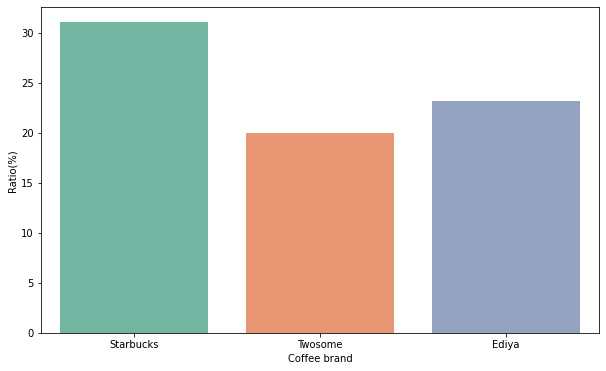

In [ ]:
plt.figure(figsize=(10,6))
plt.xlabel('Coffee brand')
plt.ylabel('Ratio(%)')
sns.barplot( x=['Starbucks','Twosome','Ediya'], y=[31.07, 19.95, 23.22], palette='Set2')
plt.show()